In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("sales.csv")
df.head()

,Unnamed: 0,sales
0,1,87695
1,2,86890
2,3,96442
3,4,98133
4,5,113615


<Axes: >

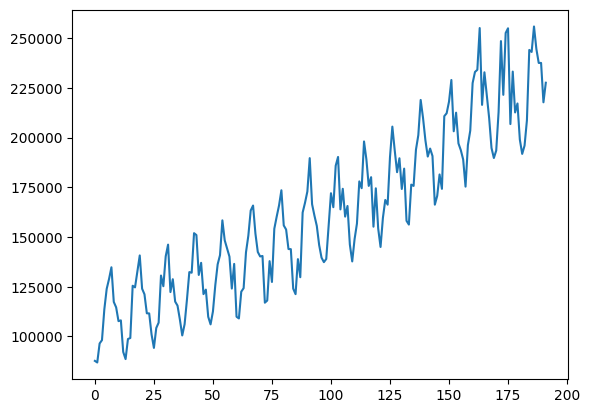

In [ ]:
sale = df["sales"]
sale.plot()

(100000.0, 175000.0)

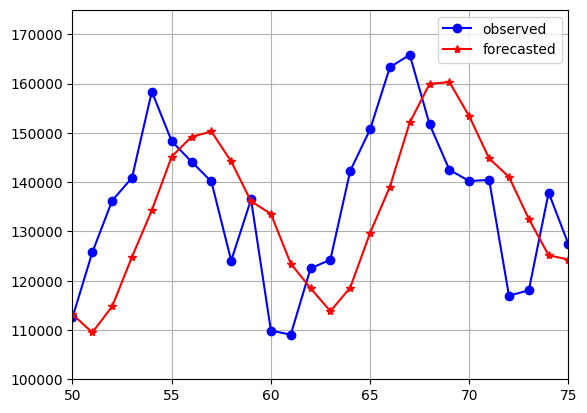

In [ ]:
ypred = sale.rolling(3).mean().shift(1)

plt.plot(sale, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()
plt.xlim([50,75])
plt.ylim([1e5, 1.75e5])

In [ ]:
def mean_absolute_percentage_error(y, ypred):
    return np.mean(np.abs(y - ypred) / np.abs(y)) * 100

8.159134875603039


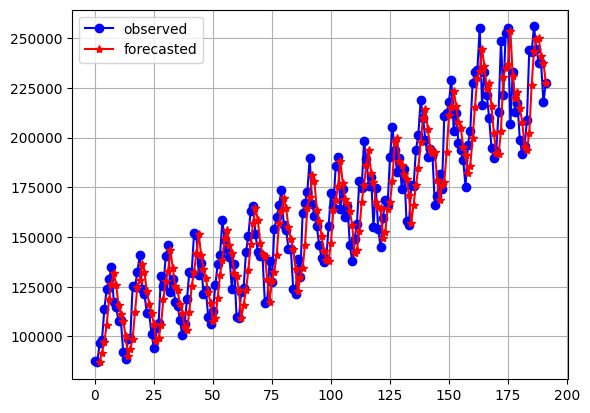

In [ ]:
ypred = sale.rolling(2).mean().shift(1)

plt.plot(sale, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale, ypred))

In [ ]:
best_mape = np.inf

for k in range(2,16):
    ypred = sale.rolling(k).mean().shift(1)
    mape = mean_absolute_percentage_error(sale,ypred)
    if mape < best_mape:
        best_mape = mape
        best_k = k

print(best_k)

2


7.438864338112351


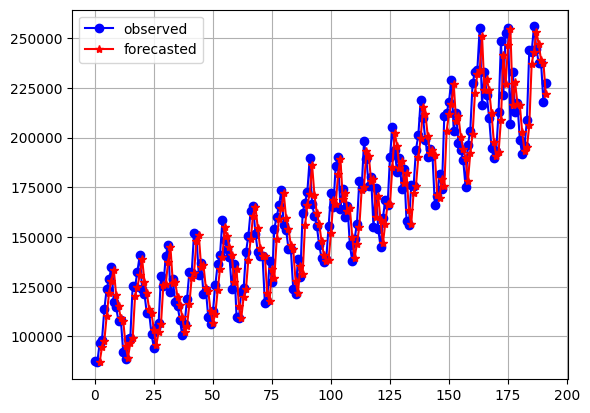

In [23]:
w = np.array([0.8, 0.2])
k = w.size
ypred = sale.rolling(k).apply(lambda x: np.sum(x * w[::-1])).shift(1)

plt.plot(sale, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


7.296507676627731


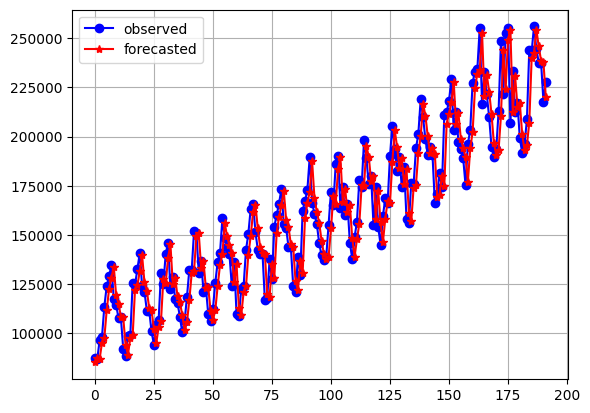

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mdl = ExponentialSmoothing(sale).fit()

ypred = mdl.fittedvalues

plt.plot(sale, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale, ypred))

In [26]:
sale_train = sale[:-12]
sale_test = sale[-12:]
sale_test

180    199024
181    191813
182    195997
183    208684
184    244113
185    243108
186    255918
187    244642
188    237579
189    237579
190    217775
191    227621
Name: sales, dtype: int64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


8.975700917231393


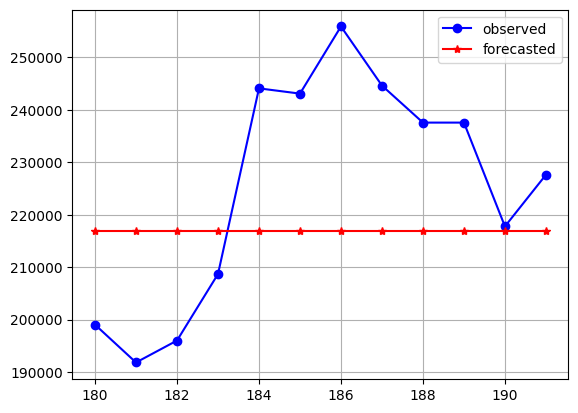

In [28]:
mdl = ExponentialSmoothing(sale_train).fit()

ypred = mdl.predict(sale_test.index[0],sale_test.index[-1])

plt.plot(sale_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale_test, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


8.13042762432413


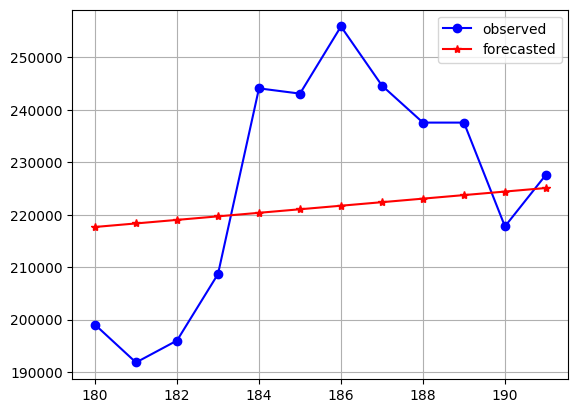

In [29]:
mdl = ExponentialSmoothing(sale_train, trend="add").fit()

ypred = mdl.predict(sale_test.index[0],sale_test.index[-1])

plt.plot(sale_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale_test, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


8.10585042965287


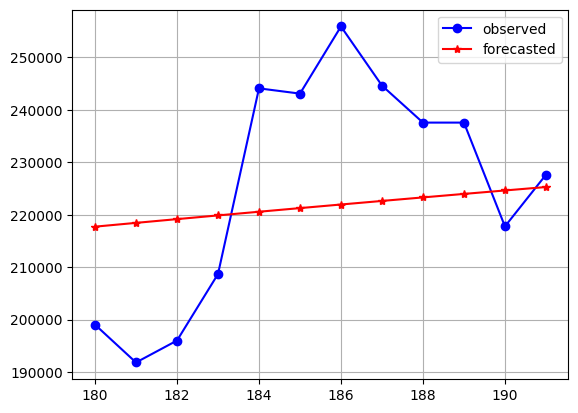

In [30]:
mdl = ExponentialSmoothing(sale_train, trend="add", damped_trend=True).fit()

ypred = mdl.predict(sale_test.index[0],sale_test.index[-1])

plt.plot(sale_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale_test, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


3.0745818427300704


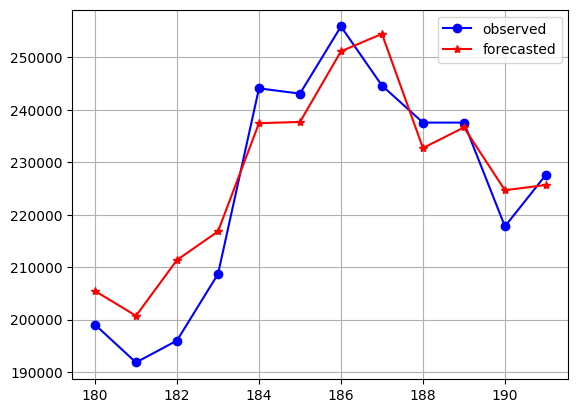

In [31]:
mdl = ExponentialSmoothing(sale_train, trend="add", damped_trend=True, seasonal="add", seasonal_periods=12).fit()

ypred = mdl.predict(sale_test.index[0],sale_test.index[-1])

plt.plot(sale_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale_test, ypred))

In [33]:
trend = [None, "add", "mul"]
damp = [False, True]
seasonal = [None, "add", "mul"]

best_mape = np.inf

for t in trend:
    for d in damp:
        for s in seasonal:
            if t == None:
                d = False
            mdl = ExponentialSmoothing(sale_train, trend=t, damped_trend=d, seasonal=s, seasonal_periods=12).fit()
            ypred = mdl.predict(sale_test.index[0],sale_test.index[-1])
            mape = mean_absolute_percentage_error(sale_test, ypred)
            if mape < best_mape:
                best_mape = mape
                best_param = (t,d,s)

print(best_param)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_

('mul', True, 'mul')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2.3458753938387824


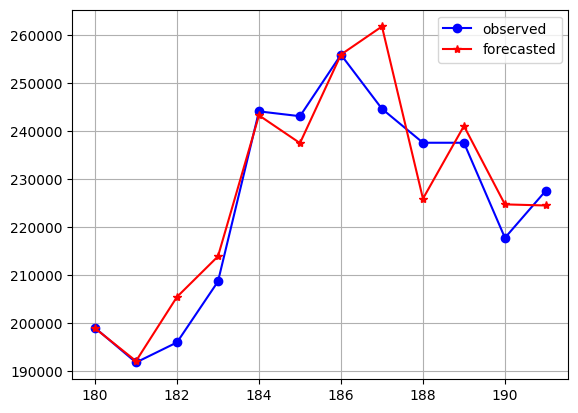

In [34]:
mdl = ExponentialSmoothing(sale_train, trend="mul", damped_trend=True, seasonal="mul", seasonal_periods=12).fit()

ypred = mdl.predict(sale_test.index[0],sale_test.index[-1])

plt.plot(sale_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(sale_test, ypred))



In [39]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])

    return np.array(X), np.array(y)

X, y = make_data(sale, lag = 12)
print(X.shape)
print(y.shape)

(180, 12)
(180,)


In [40]:
X_train = X[:-12]
y_train = y[:-12]

X_test = X[-12:]
y_test = y[-12:]

3.759287759553375


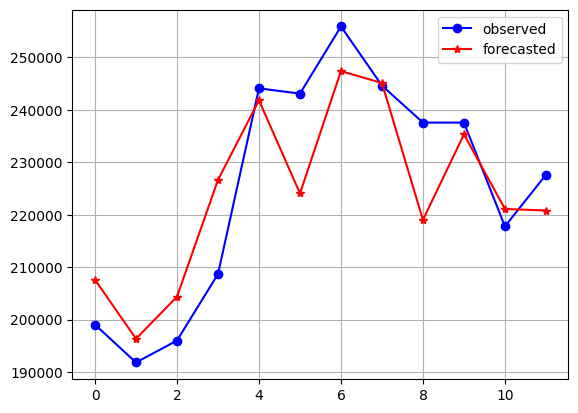

In [41]:
from sklearn.ensemble import RandomForestRegressor

mdl = RandomForestRegressor()
mdl.fit(X_train, y_train)

ypred = mdl.predict(X_test)

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(y_test, ypred))

In [42]:
def make_data(data, lag = 3, period = 2):
    X = []
    y = []
    for i in range(len(data) - lag - period):
        X.append(data[i:i+lag])
        y.append(data[i+lag : i+lag+period])

    return np.array(X), np.array(y)

X, y = make_data(sale, lag = 12, period =  12)
print(X.shape)
print(y.shape)

(168, 12)
(168, 12)


In [43]:
X_train = X[:-1]
y_train = y[:-1]

X_test = X[-1:]
y_test = y[-1:]

4.235022362643578


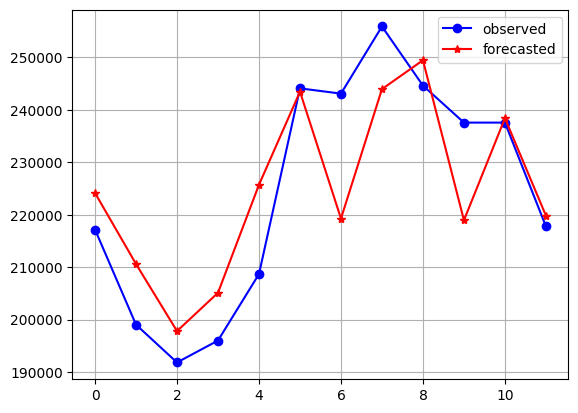

In [46]:
from sklearn.multioutput import MultiOutputRegressor

mdl = MultiOutputRegressor(RandomForestRegressor())

mdl.fit(X_train, y_train)

ypred = mdl.predict(X_test)
ypred.shape

ypred = ypred.ravel()
y_test = y_test.ravel()

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(y_test, ypred))